In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
df = pd.read_csv("taxi_1m.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,7add8da2d38f6c900afe4ef2d9f58082fe24a7a6,c49f0ddc62fe52ff6d19832b7168a6818f17d8ccb7f59a...,2015-10-15 22:30:00+00:00,2015-10-15 22:45:00+00:00,1080.0,8.4,NaN,NaN,14.0,NaN,21.45,0.00,0.0,5.0,26.45,Cash,Taxi Affiliation Services,41.968069,-87.721559,POINT (-87.7215590627 41.968069),NaN,NaN,NaN
1,0026fa0e63aa811b282328230b15bfeaa346b7a6,1e5b69c83640bd5225fb3ccc33bc989b859f3e4cdb59f6...,2015-10-15 01:00:00+00:00,2015-10-15 01:15:00+00:00,720.0,7.6,NaN,NaN,14.0,NaN,17.25,0.00,0.0,0.0,17.25,Cash,Dispatch Taxi Affiliation,41.968069,-87.721559,POINT (-87.7215590627 41.968069),NaN,NaN,NaN
2,d4b1c10236b77b0d93eb539c330a2f30f844d634,d3a5f1452b4a1db2a547e7a0aabfe28d67c62b0e40155f...,2015-10-30 02:15:00+00:00,2015-10-30 02:45:00+00:00,1500.0,18.3,NaN,NaN,14.0,NaN,37.25,7.65,0.0,1.0,45.90,Credit Card,Dispatch Taxi Affiliation,41.968069,-87.721559,POINT (-87.7215590627 41.968069),NaN,NaN,NaN
3,324c18250ae3d67895c975bd57b9099a666893da,b4536ae68b6ac3fbe936c28e5c6739c9145a08443e70a7...,2015-10-30 21:00:00+00:00,2015-10-30 21:00:00+00:00,0.0,0.0,NaN,NaN,14.0,NaN,3.25,0.00,0.0,0.0,3.25,Cash,Taxi Affiliation Services,41.968069,-87.721559,POINT (-87.7215590627 41.968069),NaN,NaN,NaN
4,06ba210ec4ad4e1fa24ccf891aeda2a3bc96a0be,ad33dffdd6cd00795ea1a00a6a6db1a38482075d532b55...,2015-09-26 08:30:00+00:00,2015-09-26 08:45:00+00:00,720.0,3.6,NaN,NaN,14.0,NaN,10.65,0.00,0.0,0.0,10.65,Cash,Dispatch Taxi Affiliation,41.968069,-87.721559,POINT (-87.7215590627 41.968069),NaN,NaN,NaN


In [4]:
df.shape

(607817, 23)

In [5]:
# Drop unique_key, row id has same meaning for us
df.drop(columns=["unique_key"], inplace=True)

In [6]:
# Check distinct info between pickup/dropoff location and lon/lat
print(df[pd.isna(df.pickup_location) ^ (pd.isna(df.pickup_latitude) | pd.isna(df.pickup_longitude))].shape[0])
print(df[pd.isna(df.dropoff_location) ^ (pd.isna(df.dropoff_latitude) | pd.isna(df.dropoff_longitude))].shape[0])

0
0


In [7]:
# Drop pickup/dropoff location as they do not contain any additional info
df.drop(columns=["pickup_location", "dropoff_location"], inplace=True)

In [8]:
# Check for mislabelad lat/lon
print(df.pickup_latitude.min(), df.pickup_latitude.max())
print(df.pickup_longitude.min(), df.pickup_longitude.max())
print(df.dropoff_latitude.min(), df.dropoff_latitude.max())
print(df.dropoff_longitude.min(), df.dropoff_longitude.max())

41.660136051 42.021223593
-87.913624596 -87.53490290100001
41.660136051 42.016046492
-87.913624596 -87.53490290100001


All seems valid. Nothing to do ...

# Plot trip time, distance, fare, tips, tolls, extras, trip_total

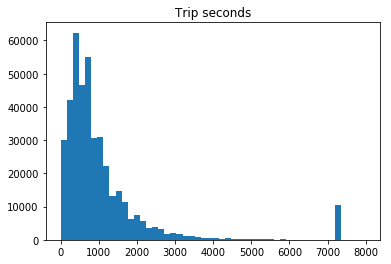

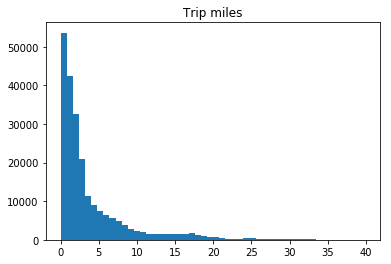

In [9]:
plt.title("Trip seconds")
plt.hist(df.trip_seconds[(0 < df.trip_seconds) & (df.trip_seconds < 8000)], bins=50)
plt.show()

plt.title("Trip miles")
plt.hist(df.trip_miles[(0 < df.trip_miles) & (df.trip_miles < 40)], bins=50)
plt.show()

In [10]:
print("# trips longer than 100 miles:", (df.trip_miles > 100).sum())

# trips longer than 100 miles: 192


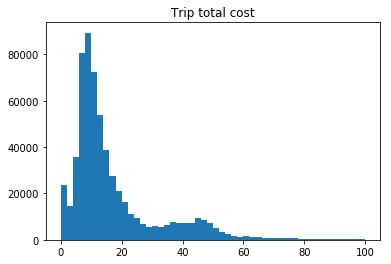

In [11]:
plt.title("Trip total cost")
plt.hist(df.trip_total[(df.trip_total < 100)], bins=50);

# Analyze trip total cost components

In [12]:
labels = []
ys = []
stds = []
percents = []
for low in range(0,150,5):
    high = low + 5
    labels.append(high)
    rows = df[(df.trip_total >= low) & (df.trip_total < high)]
    ys.append([rows.fare.mean(), rows.tips.mean(), rows.tolls.mean(), rows.extras.mean()])
    stds.append([rows.fare.std(), rows.tips.std(), rows.tolls.std(), rows.extras.std()])
    percents.append([np.mean(rows.fare/rows.trip_total),
                     np.mean(rows.tips/rows.trip_total),
                     np.mean(rows.tolls/rows.trip_total),
                     np.mean(rows.extras/rows.trip_total)])
    
ys = np.array(ys).T
stds = np.array(stds).T
percents = np.array(percents).T

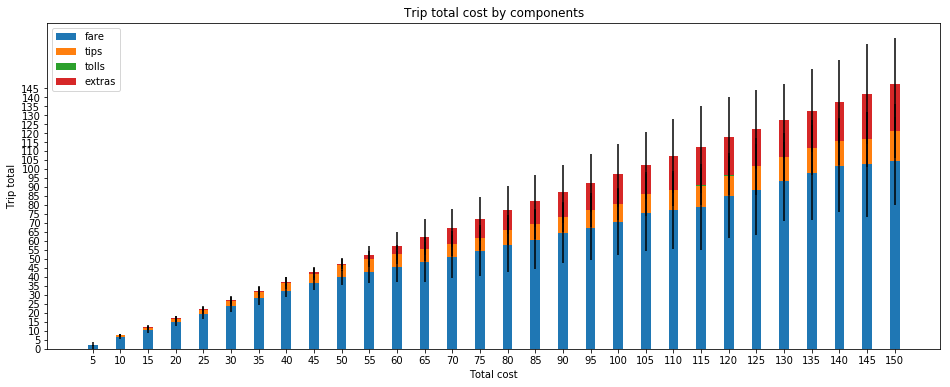

In [13]:
plt.figure(figsize=(16,6))
idx = np.arange(len(labels))
width = 0.35       # the width of the bars: can also be len(x) sequence

bottom = np.zeros(len(labels))
for y, std, label in zip(ys, stds, ["fare", "tips", "tolls", "extras"]):
    plt.bar(idx, y, width, yerr=std, label=label, bottom=bottom)
    bottom = bottom + y

plt.ylabel('Trip total')
plt.xlabel('Total cost')
plt.title('Trip total cost by components')
plt.xticks(idx, labels)
plt.yticks(np.arange(0, 150, 5))

plt.legend(loc="upper left")
plt.show()

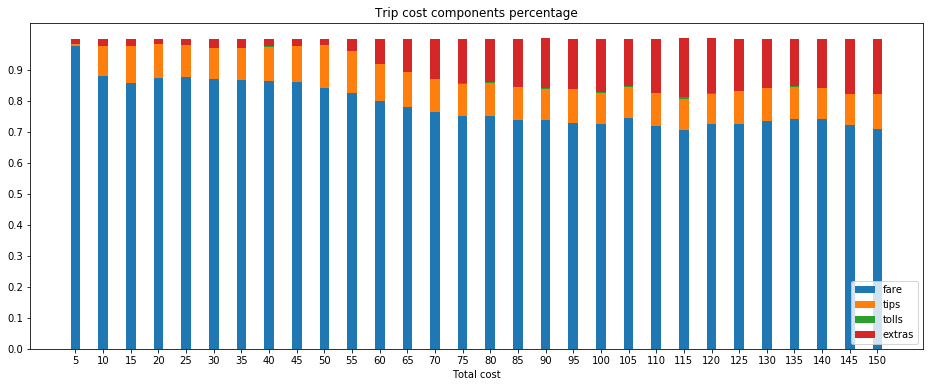

In [14]:
plt.figure(figsize=(16,6))
idx = np.arange(len(labels))
width = 0.35       # the width of the bars: can also be len(x) sequence

bottom = np.zeros(len(labels))
for p, label in zip(percents, ["fare", "tips", "tolls", "extras"]):
    plt.bar(idx, p, width, label=label, bottom=bottom)
    bottom = bottom + p

plt.title('Trip cost components percentage')
plt.xlabel('Total cost')
plt.xticks(idx, labels)
plt.yticks(np.arange(0, 1, .1))

plt.legend(loc="lower right")
plt.show()

As we can see tips are pretty much on a linear scale with fare costs.

# Visualize coordinates

In [15]:
df_vis = df[(~pd.isna(df.pickup_latitude)) & (~pd.isna(df.pickup_longitude))]
df.shape, df_vis.shape

((607817, 20), (291921, 20))

### Merge small areas

In [16]:
df.groupby('pickup_community_area').size().reset_index(name='counts').sort_values('counts', ascending=False)

,pickup_community_area,counts
7,8.0,82692
27,28.0,56492
32,33.0,23585
31,32.0,22444
2,3.0,20825
5,6.0,19361
75,76.0,17830
6,7.0,10114
40,41.0,6237
55,56.0,4600


In [17]:
areas = df.groupby('pickup_community_area').size().reset_index(name='counts')
large_areas = areas[areas.counts > 1000].pickup_community_area.to_numpy()
large_areas

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 14., 16., 21., 22., 24.,
       28., 32., 33., 41., 56., 76., 77.])

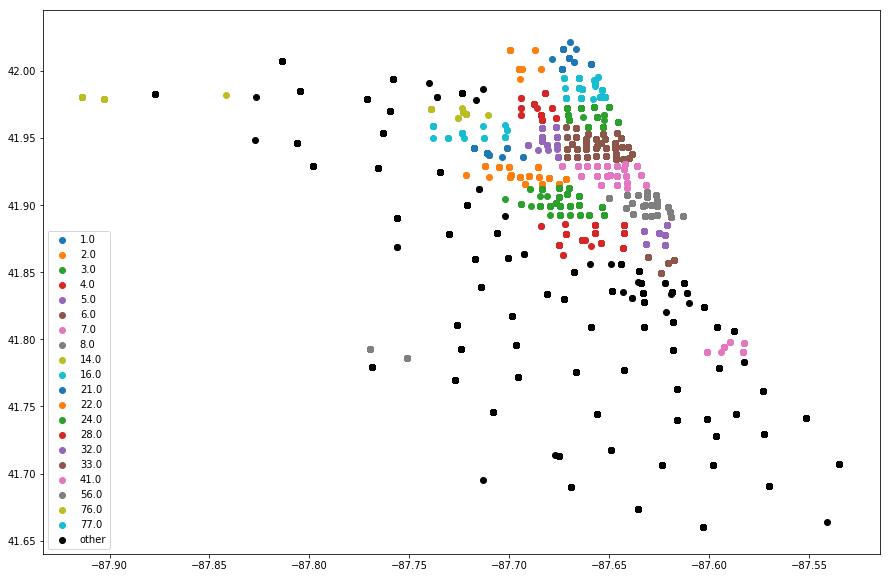

In [18]:
plt.figure(figsize=(15,10))
for area in large_areas:
    if np.isnan(area): continue
    df_area = df_vis[df_vis.pickup_community_area == area]
    plt.scatter(df_area.pickup_longitude, df_area.pickup_latitude, label=area)
    
df_area = df_vis[~df_vis.pickup_community_area.isin(large_areas)]
plt.scatter(df_area.pickup_longitude, df_area.pickup_latitude, label="other", c="black")

plt.legend(loc="lower left")
plt.show()

In [19]:
# Repleace small areas with 0
df.loc[~df.pickup_community_area.isin(large_areas), 'pickup_community_area'] = 0

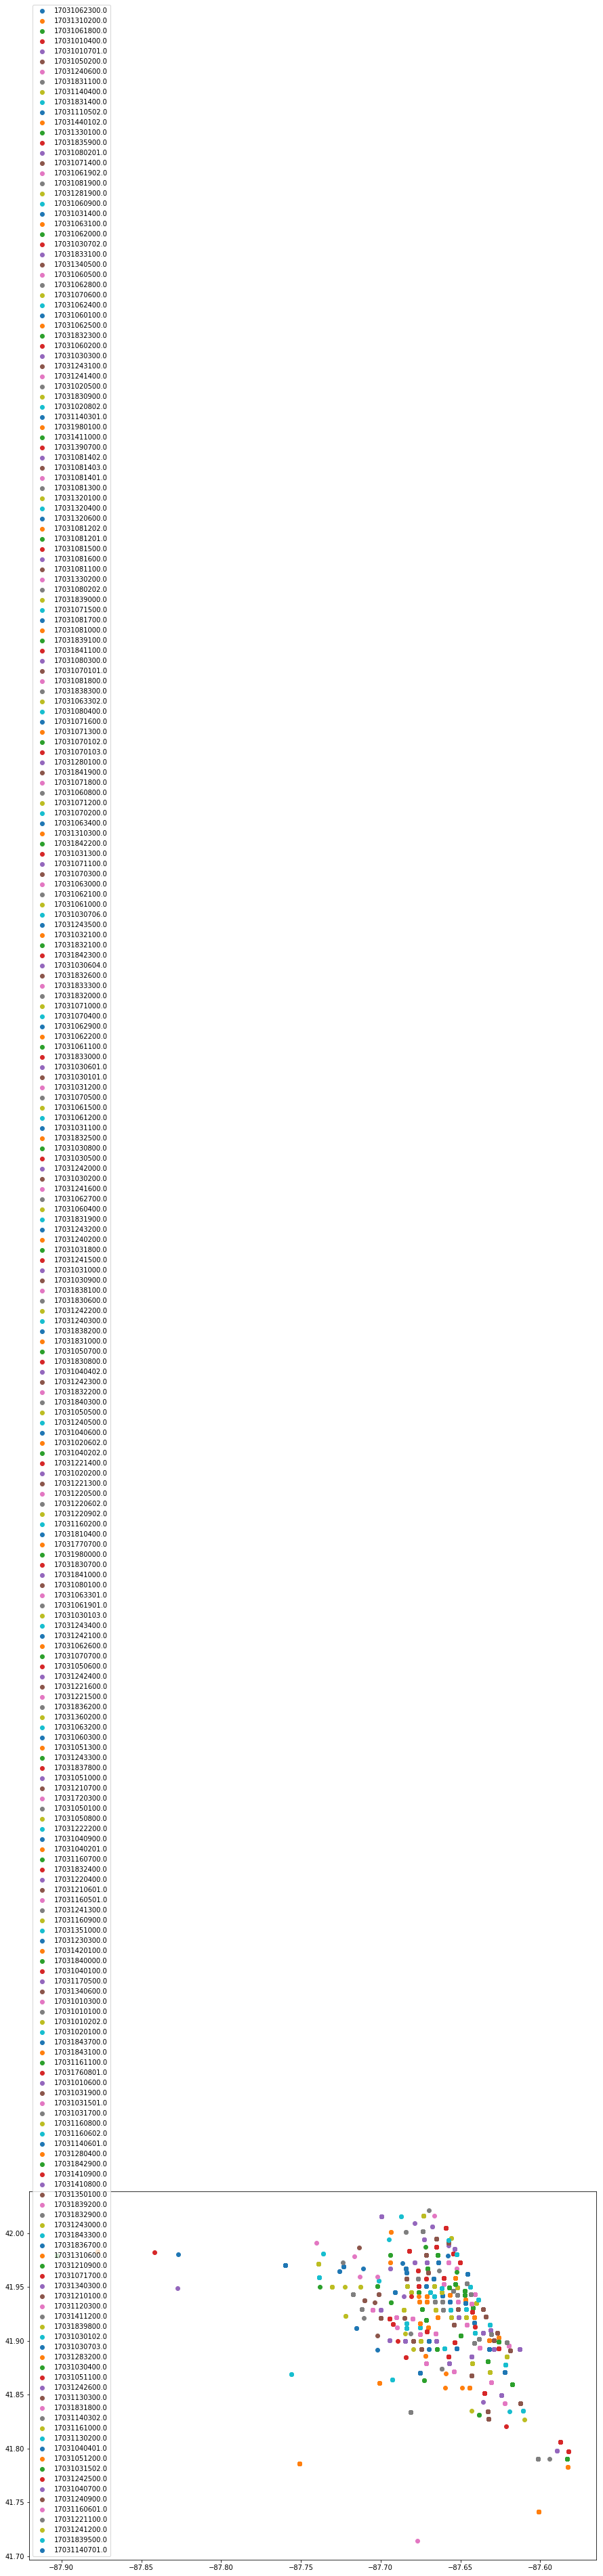

In [20]:
plt.figure(figsize=(15,10))
for area in df_vis.pickup_census_tract.unique():
    if np.isnan(area): continue
    df_area = df_vis[df_vis.pickup_census_tract == area]
    plt.scatter(df_area.pickup_longitude, df_area.pickup_latitude, label=area)
plt.legend(loc="lower left")
plt.show()

Delete census_tract as there is too many of them

In [21]:
df.drop(columns=['pickup_census_tract', 'dropoff_census_tract'], inplace=True)

In [22]:
df.dropoff_community_area.isna().sum(), df.shape[0]

(361551, 607817)

In [23]:
# Most of dropoff_community_area is missing, drop colum
df.drop(columns=['dropoff_community_area'], inplace=True)

# Clean by payment
According to Kaggle: "Cash tips generally will not be recorded."

In [24]:
df.groupby('payment_type').size()

payment_type
Cash           207500
Credit Card    363906
Dispute           403
No Charge       24427
Pcard               3
Prcard              2
Unknown         11575
dtype: int64

In [25]:
df.groupby('payment_type').fare.mean()

payment_type
Cash           12.561878
Credit Card    16.899949
Dispute        15.437469
No Charge      10.881441
Pcard          18.383333
Prcard          9.650000
Unknown         1.108576
Name: fare, dtype: float64

Drop low cardinality classes and Unkown class as it has low fare mean. Cash payments should be also dropped because generally they are not recorded.

In [26]:
df.drop(df[~(df.payment_type == "Credit Card")].index, inplace=True)
df.drop(columns=["payment_type"], inplace=True)

# Analyze by company

In [27]:
df.groupby('company').fare.agg(('mean', 'size'))

,mean,size
company,,
0118 - 42111 Godfrey S.Awir,8.500000,2
0694 - 59280 Chinesco Trans Inc,10.050000,11
1085 - 72312 N and W Cab Co,11.490909,22
1085 - N and W Cab Co,29.150000,2
1247 - 72807 Daniel Ayertey,11.784091,22
1247 - Daniel Ayertey,21.210000,5
2192 - 73487 Zeymane Corp,15.729412,17
2192 - Zeymane Corp,19.583333,3
2241 - 44667 Manuel Alonso,17.650000,2


Merge small companies (same company with slighly different name could be merged)

In [28]:
df.groupby('company').size().keys()[df.groupby('company').size() < 1000]

Index(['0118 - 42111 Godfrey S.Awir', '0694 - 59280 Chinesco Trans Inc',
       '1085 - 72312 N and W Cab Co', '1085 - N and W Cab Co',
       '1247 - 72807 Daniel Ayertey', '1247 - Daniel Ayertey',
       '2192 - 73487 Zeymane Corp', '2192 - Zeymane Corp',
       '2241 - 44667 Manuel Alonso', '2241 - Manuel Alonso',
       '2733 - 74600 Benny Jona', '2733 - Benny Jona',
       '2809 - 95474 C & D Cab Co Inc.', '2823 - 73307 Seung Lee',
       '3011 - 66308 JBL Cab Inc.', '303 Taxi', '3141 - 87803 Zip Cab',
       '3141 - Zip Cab', '3152 - 97284 Crystal Abernathy',
       '3201 - C&D Cab Co Inc', '3201 - CID Cab Co Inc',
       '3319 - C&D Cab Company', '3556 - 36214 RC Andrews Cab',
       '3620 - 52292 David K. Cab Corp.', '3620 - David K. Cab Corp.',
       '3623 - 72222 Arrington Enterprises', '3897 - Ilie Malec',
       '4053 - 40193 Adwar H. Nikola', '4053 - Adwar H. Nikola',
       '4197 - 41842 Royal Star', '4615 - 83503 Tyrone Henderson',
       '4615 - Tyrone Henderson', '462

In [29]:
df.loc[df.company.isin(df.groupby('company').size().keys()[df.groupby('company').size() < 1000]), 'company'] = "other"

In [30]:
# Fill missing companies with other
df.company.fillna("other", inplace=True)

# Add date features

In [31]:
df['trip_start_timestamp'] = df.trip_start_timestamp.astype("datetime64")

In [32]:
df['day_name'] = df.trip_start_timestamp.dt.day_name()
df['is_weekend'] = (df.day_name == "Sunday") | (df.day_name == "Saturday")
df['day_of_year'] = df.trip_start_timestamp.dt.dayofyear
df['hour'] = df.trip_start_timestamp.dt.hour
df['weekday'] = df.trip_start_timestamp.dt.weekday

In [33]:
df.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,fare,tips,tolls,extras,trip_total,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,day_name,is_weekend,day_of_year,hour,weekday
2,d3a5f1452b4a1db2a547e7a0aabfe28d67c62b0e40155f...,2015-10-30 02:15:00,2015-10-30 02:45:00+00:00,1500.0,18.3,14.0,37.25,7.65,0.0,1.0,45.90,Dispatch Taxi Affiliation,41.968069,-87.721559,NaN,NaN,Friday,False,303,2,4
7,d3a5f1452b4a1db2a547e7a0aabfe28d67c62b0e40155f...,2015-10-28 05:00:00,2015-10-28 05:45:00+00:00,3120.0,35.7,14.0,68.45,0.00,6.5,25.0,99.95,Dispatch Taxi Affiliation,41.968069,-87.721559,NaN,NaN,Wednesday,False,301,5,2
11,690e6f6c8d77a5d90d150573dc42de392e58ba1e2ca4ae...,2015-10-20 18:30:00,2015-10-20 19:00:00+00:00,1500.0,7.5,14.0,19.65,5.00,0.0,5.0,29.65,Dispatch Taxi Affiliation,41.968069,-87.721559,NaN,NaN,Tuesday,False,293,18,1
27,ee6216cc0f10e2d9b4a4e875fa910a413dde12495038a5...,2016-01-28 07:00:00,2016-01-28 08:15:00+00:00,4680.0,44.1,14.0,105.75,15.00,0.0,74.5,195.25,Dispatch Taxi Affiliation,41.968069,-87.721559,NaN,NaN,Thursday,False,28,7,3
29,477e2191cd2213e2db9413d810936b2f24a73c8e527059...,2015-10-20 08:45:00,2015-10-20 09:15:00+00:00,1500.0,5.1,14.0,15.85,3.15,0.0,0.0,19.00,Taxi Affiliation Services,41.968069,-87.721559,NaN,NaN,Tuesday,False,293,8,1


# Handle still missing values

### Trip time

In [34]:
# Check which variables are missing
df.isnull().any(axis=0)

taxi_id                  False
trip_start_timestamp     False
trip_end_timestamp       False
trip_seconds              True
trip_miles               False
pickup_community_area    False
fare                     False
tips                     False
tolls                     True
extras                   False
trip_total               False
company                  False
pickup_latitude           True
pickup_longitude          True
dropoff_latitude          True
dropoff_longitude         True
day_name                 False
is_weekend               False
day_of_year              False
hour                     False
weekday                  False
dtype: bool

In [35]:
df.isnull().trip_seconds.sum() / df.shape[0]

0.3505520656433255

Trip time is missing at 1/3 of dataset

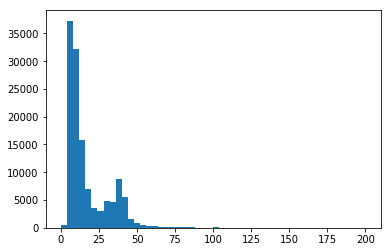

In [36]:
plt.hist(df[df.isnull().trip_seconds].fare, bins=50);

As we can see not only the low cost trips' seconds are missing so replacing trip_seconds with zeros would not be correct, drop these rows instead

In [37]:
df = df[~df.isnull().trip_seconds]
df.shape

(236338, 21)

### Tolls

In [38]:
# Missing toll values
df.isnull().tolls.sum() / df.shape[0]

0.1313203970584502

In [39]:
# Toll values that are 0
df[df.tolls == 0].shape[0] / df.shape[0]

0.8670378864169114

As we can see most tolls are zero the remaining part is almost missing, replacing with zeros may be good enough

In [40]:
df.tolls.fillna(0, inplace=True)

### Target
I would like to predict the tips, so tips always has to be less than the total cost is the trip

In [41]:
(df.tips >= df.trip_total).sum()

201

In [42]:
# Keep correct rows
df = df[df.tips < df.trip_total]

# Save cleaned datase

In [43]:
df.to_csv("taxi_cleaned.csv", index=False)